# Level 1: Best Rated Movie

This challenge is to obtain the top-rated in theater movie from [rotten tomatoes - In Theaters | Top Box Office](https://www.rottentomatoes.com/browse/in-theaters?minTomato=0&maxTomato=100&genres=1;2;4;5;6;8;9;10;11;13;18;14&sortBy=popularity).

_Challenge instruction_:

- web scrape the data from the following address: [rotten tomatoes - In Theaters | Top Box Office](https://www.rottentomatoes.com/browse/in-theaters?minTomato=0&maxTomato=100&genres=1;2;4;5;6;8;9;10;11;13;18;14&sortBy=popularity)
- The output data should only contain the following columns: `title`: string, `tomatoScore`: numeric, `rank`: numeric (the position based on `tomato score`, e.g., if we have 3 scores like 100, 100, 98, the corresponding rank is 1, 1, 3).
- the rank is based on the order of `tomato score` (descending) then `movie title` (ascending).
- we expect 40 records with tomato scores, but this could change at the time when you scrape the web page
- please upload your .ipynb script and a csv with 3 columns.


## Introduction

Python has various libraries that can help you to do web scraping. Before starting, let's think first how should we approach the problem.

The idea to scrap a website should follow: 

- check if someone already built something
- check if an API is publicly available or privately available
- last resort, go scrap on your own

> Below we will ask you to fill `_____` so you can run the code block.

## Do not reinvent the wheel

The smart way to start a webscraping project is to look around if someone already built something ready to use.

With a quick search, we found an existing package that already does the job for this challenge: https://github.com/jaebradley/rotten_tomatoes_client

In [ ]:
# install the packages
! pip install rotten_tomatoes_client

In [ ]:
import pandas as pd
from rotten_tomatoes_client import RottenTomatoesClient, MovieBrowsingQuery, Service, Genre, SortBy, MovieBrowsingCategory

In [ ]:
# now query for the movie that is IN THEATERS
# we get all of them without a filter on rating
# sorted by popularity
query = MovieBrowsingQuery(minimum_rating=___, maximum_rating=___, 
                           certified_fresh=False, sort_by=____,
                           category=___)

result = RottenTomatoesClient.browse_movies(query=___)

In [ ]:
# check what is in the result
result.keys()

In [ ]:
# we now parse the result with pandas, as the result is returned as a dictionary
# sort on tomatoScore, highest first
pd.DataFrame(____).sort_values('____', ascending=____)

In [ ]:
# Check the interesting `debugURL`. It seems there is some hidden URL we can call.
result['debugUrl']

Well, we are able to grab at least the top 32 movies from this package, which is a good starting point. 

As mentioned [here](https://github.com/jaebradley/rotten_tomatoes_client/issues/15), the package tried to incorporate reading more pages. But it is not working.

We can create an issue in the GitHub to address this. But it seems that the maintainer is no longer maintain this package. So we better go to the second step: parse API on our own.

## Going Wild

With the information provided from the above package, we discovered a private API endpoint, that we can scrape some data without parsing the HTML.

![alt text](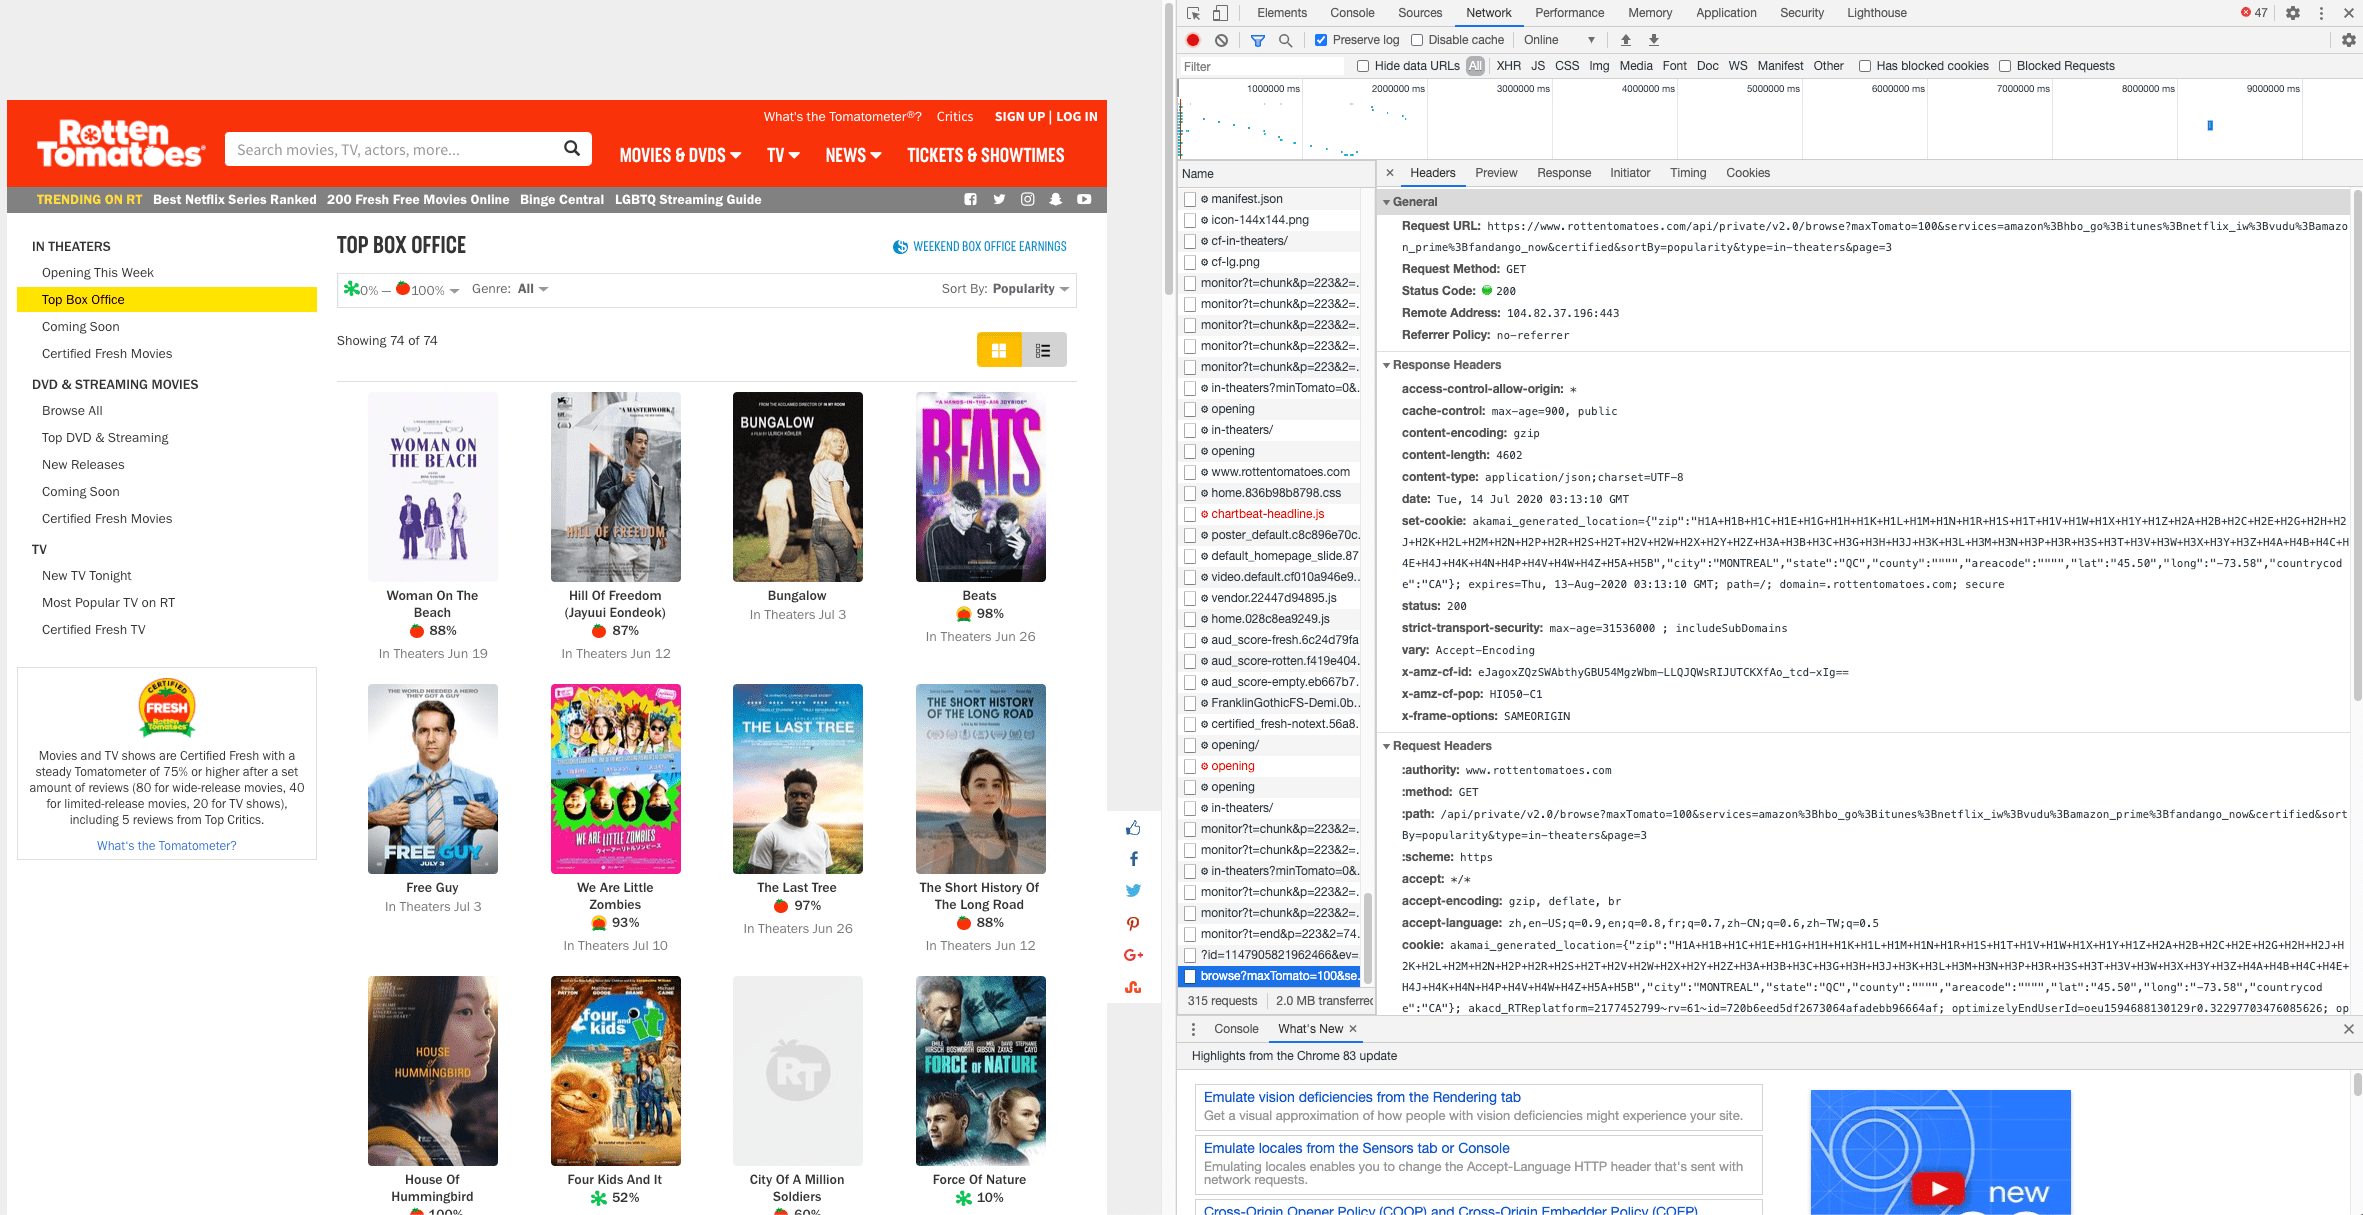
)

By using the Chrome `network` tab, we are able to identify the API URL (above image).

In [ ]:
import requests
import json

In [ ]:
# identify the base URL from the image above, or do it on your own via chrome
# click right - inspect element - network >
# reload or click on 'more' to find out the hidden API.
# fill "?????" with the right url address
base_url = "https://www.rottentomatoes.com/api/??????/v2.0/browse"


parameters = {
    "maxTomato": 100,
    "Services": "amazon%3Bhbo_go%3Bitunes%3Bnetflix_iw%3Bvudu%3Bamazon_prime%3Bfandango_now",
    "certifies": None,
    "sortBy": "____",
    "type": "______",
    "page": 1
}

In [ ]:
# get pages with requests.get
response = requests.get(____, params=____)

In [ ]:
print(f"Make sure the API returns status code is 200: {response.status_code}")

Now, let's going wild to parse all the pages. We know the API returns the following information, which gives me a hint that how many pages we have in total.

In [ ]:
response.json()['counts']

Now we are able to get the result from the URL. We are going to fix the parsing issue and try to read all the data from the API.

In [ ]:
def retrieve_movie_list():
    # basic parameter
    base_url = "https://www.rottentomatoes.com/api/??????/v2.0/browse"
    parameters = {
    "maxTomato": 100,
    "Services": "amazon%3Bhbo_go%3Bitunes%3Bnetflix_iw%3Bvudu%3Bamazon_prime%3Bfandango_now",
    "certifies": None,
    "sortBy": "______",
    "type": "________",
    "page": 1
    }

    # loop parameter
    flag_done = False
    page = 1
    count = 0
    res_list = []

    # loop 
    while flag_done == False:
        # set paging
        parameters['page'] = ______

        # API GET
        response = requests.get(______, params=______)

        # json to dict
        res_json = response.json()

        # extend the list with the new result
        res_list.extend(res_json['______'])

        # get count and increment page +=1
        count += res_json['______']['_____']
        page += ____

        # condition to get out the loop
        if count == res_json['counts']['total']:
            flag_done=True
    
    return res_list

In [ ]:
res_list = retrieve_movie_list()
len(res_list)

In [ ]:
# sort
solution = pd.DataFrame(res_list).sort_values(__________, ascending=__________).reset_index()
# get 2 columns specified in instruction and drop duplicagtes, remove NA
solution = solution[__________].drop_duplicates().dropna()
# create rank column
solution['rank'] = solution.tomatoScore.rank(method='___', ascending=____)

In [ ]:
solution.head(10)

## Save & Upload
> Please upload the following csv and this ipynb notebook.

In [ ]:
solution.to_csv('solution_level_1.csv', index=False)